In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Desligar mensagens de aviso
import warnings
warnings.simplefilter("ignore")

In [19]:
# iris = datasets.load_iris()

In [21]:
# type(iris)

sklearn.utils._bunch.Bunch

In [20]:
# iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
# Caminho e leitura do arquivo (optei pela simplicidade de ler o arquivo)

#listar colunas
columns = ['Sepala Altura', 'Sepala Largura', 'Petala Altura', 'Petala Largura', 'Especie']
#ler arquivos e passar a lista de colunas
data=pd.read_csv('/content/Iris.csv', names=columns)
#cabeçalho
data.head()


,Sepala Altura,Sepala Largura,Petala Altura,Petala Largura,Especie
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [38]:
#referencia
data = data.iloc[1: , :]

In [35]:
#informacoes sobre os dados

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Id to 150
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sepala Altura   151 non-null    object
 1   Sepala Largura  151 non-null    object
 2   Petala Altura   151 non-null    object
 3   Petala Largura  151 non-null    object
 4   Especie         151 non-null    object
dtypes: object(5)
memory usage: 7.1+ KB


In [40]:
# Transformando o tipo para float

data['Sepala Altura'] = data['Sepala Altura'].astype(float)
data['Sepala Largura'] = data['Sepala Largura'].astype(float)
data['Petala Altura'] = data['Petala Altura'].astype(float)
data['Petala Largura'] = data['Petala Largura'].astype(float)

In [41]:
#verificar transformação

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepala Altura   150 non-null    float64
 1   Sepala Largura  150 non-null    float64
 2   Petala Altura   150 non-null    float64
 3   Petala Largura  150 non-null    float64
 4   Especie         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [43]:
# dados descritos

data.describe().T


,count,mean,std,min,25%,50%,75%,max
Sepala Altura,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepala Largura,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petala Altura,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petala Largura,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [49]:
# analisar se tem algo faltando

data.isnull().sum()




Sepala Altura     0
Sepala Largura    0
Petala Altura     0
Petala Largura    0
Especie           0
dtype: int64

In [48]:
# contagem de espécies

data['Especie'].value_counts()

Especie
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [50]:
df = data

In [59]:
df.keys()

Index(['Sepala Altura', 'Sepala Largura', 'Petala Altura', 'Petala Largura',
       'Especie'],
      dtype='object')

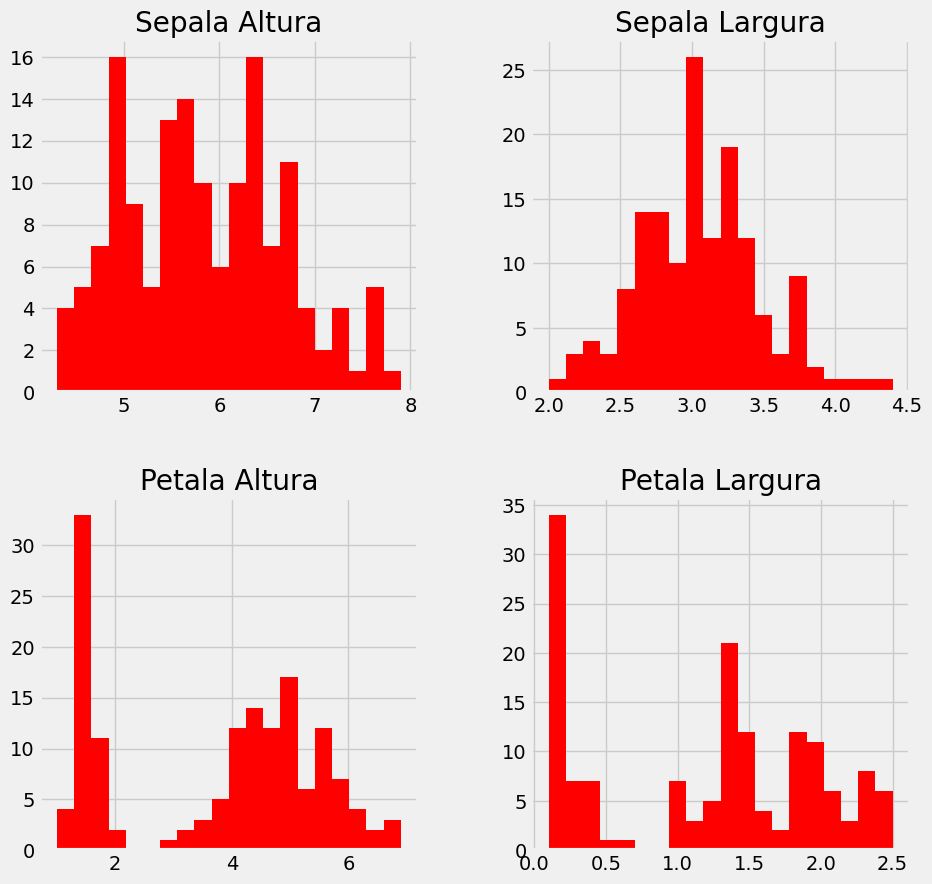

In [58]:
plt.style.use('fivethirtyeight')
df.hist(bins=20, figsize=(10, 10),color='red')
plt.show()


In [60]:
# divisao dos dados

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [61]:
# Separando as variaveis dos dados em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [69]:
# criando o modelo c/ regressão logistica
reg = LogisticRegression(random_state = 0)
reg.fit(X_treino, y_treino)

LogisticRegression(random_state=0)

In [71]:
# previsao espécie

y_pred=reg.predict(X_teste)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [72]:
# estabelecendo matriz

cm = confusion_matrix(y_teste, y_pred)
print("Matriz de confusão: \n",cm)
accuracy=accuracy_score(y_teste, y_pred)*100
print("Precisão: {:.2f}".format(accuracy))


Matriz de confusão: 
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Precisão: 100.00


In [74]:
cr = classification_report(y_teste, y_pred)
print("Classificação: \n ",cr)

Classificação: 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



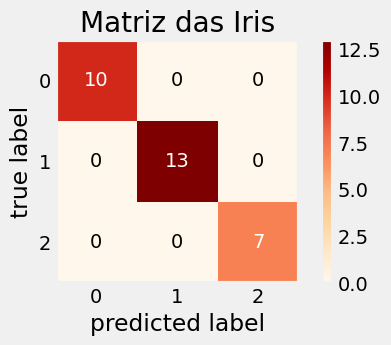

In [86]:
# botando a matriz de confusão pra rodar

from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_teste, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                cmap='OrRd',
                                colorbar=True,
                               figsize=(5, 3))
plt.title("Matriz das Iris")
plt.show()

In [91]:
X_teste['previsões'] = y_pred

In [93]:
X_teste.head()


,Sepala Altura,Sepala Largura,Petala Altura,Petala Largura,predictions,previsões
88,6.3,2.3,4.4,1.3,Iris-versicolor,Iris-versicolor
112,6.4,2.7,5.3,1.9,Iris-virginica,Iris-virginica
11,5.4,3.7,1.5,0.2,Iris-setosa,Iris-setosa
92,6.1,3.0,4.6,1.4,Iris-versicolor,Iris-versicolor
50,5.0,3.3,1.4,0.2,Iris-setosa,Iris-setosa
